In [21]:
import pandas as pd
from critdd import Diagram

## Wilconxon Statistics

In [ ]:
# download example data
df = pd.read_csv('logging.csv').pivot(
    index = "dataset",
    columns = "method",
    values = "accuracy"
)

In [68]:
df

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I
dataset,,,,,,,,
BME,0.89,0.91,0.85,0.86,0.92,0.89,1.00,0.82
BeetleFly,0.70,0.75,0.75,0.75,0.80,0.85,0.88,0.80
BirdChicken,0.75,0.55,0.60,0.60,0.60,0.85,0.88,0.85
Coffee,0.96,1.00,0.96,0.96,1.00,0.96,1.00,0.97
DistalPhalanxOutlineAgeGroup,0.71,0.62,0.68,0.64,0.64,0.67,0.76,0.83
ECG200,0.79,0.88,0.90,0.87,0.89,0.71,0.88,0.87
FaceFour,0.84,0.70,0.93,0.92,0.86,0.87,0.96,0.94
GunPoint,0.89,0.91,0.95,0.95,0.91,0.51,0.98,0.95
Herring,0.55,0.42,0.59,0.55,0.52,0.48,0.46,0.69


In [73]:
from scipy.stats import wilcoxon
import csv

# Example data: paired observations
tmw = df["TMW-N-I"].values
tmw_1 = df["TMW-S-I"].values

for method in ["Euclidean"]:
    compete = df[method].values

# Perform the Wilcoxon signed-rank test
    stat, p_value = wilcoxon(tmw, compete)

    # Output results
    print(f"Wilcoxon test statistic: {stat} between tmw and {method}")
    print(f"P-value: {p_value}")
    with open("wilconxon.csv", "a") as f:
        f.write(f"tmw_n,{method},{p_value},{stat}\n")

    stat, p_value = wilcoxon(tmw_1, compete)

    # Output results
    print(f"Wilcoxon test statistic: {stat} between tmw_1 and {compete}")
    print(f"P-value: {p_value}")
    with open("wilconxon.csv", "a") as f:
        f.write(f"tmw_s,{method},{p_value},{stat}\n")

Wilcoxon test statistic: 0.0 between tmw and Euclidean
P-value: 0.0006533107814151373
Wilcoxon test statistic: 15.0 between tmw_1 and [0.91 0.75 0.55 1.   0.62 0.88 0.7  0.91 0.42 0.9  0.88 0.82 0.94 0.69
 0.86 0.79 0.54]
P-value: 0.003557224830986071


In [75]:
df = pd.read_csv("logging.csv")
df

,Unnamed: 0,dataset,method,accuracy,time_eval
0,0,BeetleFly,DTW,0.70,2.780
1,1,BME,DTW,0.89,2.098
2,2,Coffee,DTW,0.96,1.592
3,3,SwedishLeaf,DTW,0.75,133.898
4,4,BirdChicken,DTW,0.75,2.701
...,...,...,...,...,...
131,12,OliveOil,Euclidean,0.82,NaN
132,13,Plane,Euclidean,0.94,NaN
133,14,SonyAIBORobotSurface1,Euclidean,0.69,NaN
134,15,SonyAIBORobotSurface2,Euclidean,0.86,NaN


In [45]:
df = df.drop(columns="time_eval")
df

,Unnamed: 0,dataset,method,accuracy
0,0,BeetleFly,dtw,0.70
1,1,BME,dtw,0.89
2,2,Coffee,dtw,0.96
3,3,SwedishLeaf,dtw,0.75
4,4,BirdChicken,dtw,0.75
...,...,...,...,...
131,12,OliveOil,Euclidean,0.82
132,13,Plane,Euclidean,0.94
133,14,SonyAIBORobotSurface1,Euclidean,0.69
134,15,SonyAIBORobotSurface2,Euclidean,0.86


In [76]:
df = df.pivot(
    index = "dataset",
    columns = "method",
    values = "accuracy"
)
df

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I
dataset,,,,,,,,
BME,0.89,0.91,0.85,0.86,0.92,0.89,1.00,0.82
BeetleFly,0.70,0.75,0.75,0.75,0.80,0.85,0.88,0.80
BirdChicken,0.75,0.55,0.60,0.60,0.60,0.85,0.88,0.85
Coffee,0.96,1.00,0.96,0.96,1.00,0.96,1.00,0.97
DistalPhalanxOutlineAgeGroup,0.71,0.62,0.68,0.64,0.64,0.67,0.76,0.83
ECG200,0.79,0.88,0.90,0.87,0.89,0.71,0.88,0.87
FaceFour,0.84,0.70,0.93,0.92,0.86,0.87,0.96,0.94
GunPoint,0.89,0.91,0.95,0.95,0.91,0.51,0.98,0.95
Herring,0.55,0.42,0.59,0.55,0.52,0.48,0.46,0.69


In [87]:
df = df.drop(columns="TMW_Rank")

In [88]:
df

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I
dataset,,,,,,,,
BME,0.89,0.91,0.85,0.86,0.92,0.89,1.00,0.82
BeetleFly,0.70,0.75,0.75,0.75,0.80,0.85,0.88,0.80
BirdChicken,0.75,0.55,0.60,0.60,0.60,0.85,0.88,0.85
Coffee,0.96,1.00,0.96,0.96,1.00,0.96,1.00,0.97
DistalPhalanxOutlineAgeGroup,0.71,0.62,0.68,0.64,0.64,0.67,0.76,0.83
ECG200,0.79,0.88,0.90,0.87,0.89,0.71,0.88,0.87
FaceFour,0.84,0.70,0.93,0.92,0.86,0.87,0.96,0.94
GunPoint,0.89,0.91,0.95,0.95,0.91,0.51,0.98,0.95
Herring,0.55,0.42,0.59,0.55,0.52,0.48,0.46,0.69


In [89]:
# Rank performance of TMW for each dataset, count equal value as 
rankings = df.rank(axis=1, ascending=False, method='max')
df2 = df
df2

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I
dataset,,,,,,,,
BME,0.89,0.91,0.85,0.86,0.92,0.89,1.00,0.82
BeetleFly,0.70,0.75,0.75,0.75,0.80,0.85,0.88,0.80
BirdChicken,0.75,0.55,0.60,0.60,0.60,0.85,0.88,0.85
Coffee,0.96,1.00,0.96,0.96,1.00,0.96,1.00,0.97
DistalPhalanxOutlineAgeGroup,0.71,0.62,0.68,0.64,0.64,0.67,0.76,0.83
ECG200,0.79,0.88,0.90,0.87,0.89,0.71,0.88,0.87
FaceFour,0.84,0.70,0.93,0.92,0.86,0.87,0.96,0.94
GunPoint,0.89,0.91,0.95,0.95,0.91,0.51,0.98,0.95
Herring,0.55,0.42,0.59,0.55,0.52,0.48,0.46,0.69


In [90]:
df2["TMW_N_Rank"] = rankings["TMW-N-I"]
df2["TMW_S_Rank"] = rankings["TMW-S-I"]
df2

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I,TMW_N_Rank,TMW_S_Rank
dataset,,,,,,,,,,
BME,0.89,0.91,0.85,0.86,0.92,0.89,1.00,0.82,1.0,8.0
BeetleFly,0.70,0.75,0.75,0.75,0.80,0.85,0.88,0.80,1.0,4.0
BirdChicken,0.75,0.55,0.60,0.60,0.60,0.85,0.88,0.85,1.0,3.0
Coffee,0.96,1.00,0.96,0.96,1.00,0.96,1.00,0.97,3.0,4.0
DistalPhalanxOutlineAgeGroup,0.71,0.62,0.68,0.64,0.64,0.67,0.76,0.83,2.0,1.0
ECG200,0.79,0.88,0.90,0.87,0.89,0.71,0.88,0.87,4.0,6.0
FaceFour,0.84,0.70,0.93,0.92,0.86,0.87,0.96,0.94,1.0,2.0
GunPoint,0.89,0.91,0.95,0.95,0.91,0.51,0.98,0.95,1.0,4.0
Herring,0.55,0.42,0.59,0.55,0.52,0.48,0.46,0.69,7.0,1.0


In [85]:
rankings

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I,TMW_Rank
dataset,,,,,,,,,
BME,6.0,4.0,8.0,7.0,3.0,6.0,2.0,9.0,1.0
BeetleFly,9.0,8.0,8.0,8.0,5.0,3.0,2.0,5.0,1.0
BirdChicken,5.0,9.0,8.0,8.0,8.0,4.0,2.0,4.0,1.0
Coffee,9.0,4.0,9.0,9.0,4.0,9.0,4.0,5.0,1.0
DistalPhalanxOutlineAgeGroup,4.0,9.0,5.0,8.0,8.0,6.0,3.0,2.0,1.0
ECG200,8.0,5.0,2.0,7.0,3.0,9.0,5.0,7.0,1.0
FaceFour,8.0,9.0,4.0,5.0,7.0,6.0,2.0,3.0,1.0
GunPoint,8.0,7.0,5.0,5.0,7.0,9.0,2.0,5.0,1.0
Herring,5.0,9.0,3.0,5.0,6.0,7.0,8.0,2.0,1.0


In [92]:
# Count top performance metrics
tmw_top_1 = (df["TMW_N_Rank"] == 1).sum()
tmw_top_3 = (df["TMW_N_Rank"] <= 3).sum()
tmw_worst = (df["TMW_N_Rank"] == rankings.max(axis=1)).sum()

# Mean accuracy per method
mean_accuracies = df.drop(columns=["TMW_N_Rank", "TMW_S_Rank"]).mean()

df_summary = {
    "TMW_Top1_Count": tmw_top_1,
    "TMW_Top3_Count": tmw_top_3,
    "TMW_Worst_Count": tmw_worst,
    "Mean_Accuracies": mean_accuracies
}

df_summary

{'TMW_Top1_Count': np.int64(9),
 'TMW_Top3_Count': np.int64(12),
 'TMW_Worst_Count': np.int64(0),
 'Mean_Accuracies': method
 DTW          0.817647
 Euclidean    0.774118
 OPW          0.826471
 OTW          0.813529
 POW          0.825882
 TAOT         0.750000
 TMW-N-I      0.899412
 TMW-S-I      0.879412
 dtype: float64}

In [95]:
df = df.drop(columns=["TMW_N_Rank", "TMW_S_Rank"])
df

method,DTW,Euclidean,OPW,OTW,POW,TAOT,TMW-N-I,TMW-S-I
dataset,,,,,,,,
BME,0.89,0.91,0.85,0.86,0.92,0.89,1.00,0.82
BeetleFly,0.70,0.75,0.75,0.75,0.80,0.85,0.88,0.80
BirdChicken,0.75,0.55,0.60,0.60,0.60,0.85,0.88,0.85
Coffee,0.96,1.00,0.96,0.96,1.00,0.96,1.00,0.97
DistalPhalanxOutlineAgeGroup,0.71,0.62,0.68,0.64,0.64,0.67,0.76,0.83
ECG200,0.79,0.88,0.90,0.87,0.89,0.71,0.88,0.87
FaceFour,0.84,0.70,0.93,0.92,0.86,0.87,0.96,0.94
GunPoint,0.89,0.91,0.95,0.95,0.91,0.51,0.98,0.95
Herring,0.55,0.42,0.59,0.55,0.52,0.48,0.46,0.69


In [97]:
df.to_csv("accuracy.csv")

In [93]:
tmw_top_1 = (df["TMW_S_Rank"] == 1).sum()
tmw_top_3 = (df["TMW_S_Rank"] <= 3).sum()
tmw_worst = (df["TMW_S_Rank"] == rankings.max(axis=1)).sum()

# Mean accuracy per method

df_summary = {
    "TMW_Top1_Count": tmw_top_1,
    "TMW_Top3_Count": tmw_top_3,
    "TMW_Worst_Count": tmw_worst,
}

df_summary

{'TMW_Top1_Count': np.int64(2),
 'TMW_Top3_Count': np.int64(11),
 'TMW_Worst_Count': np.int64(1)}

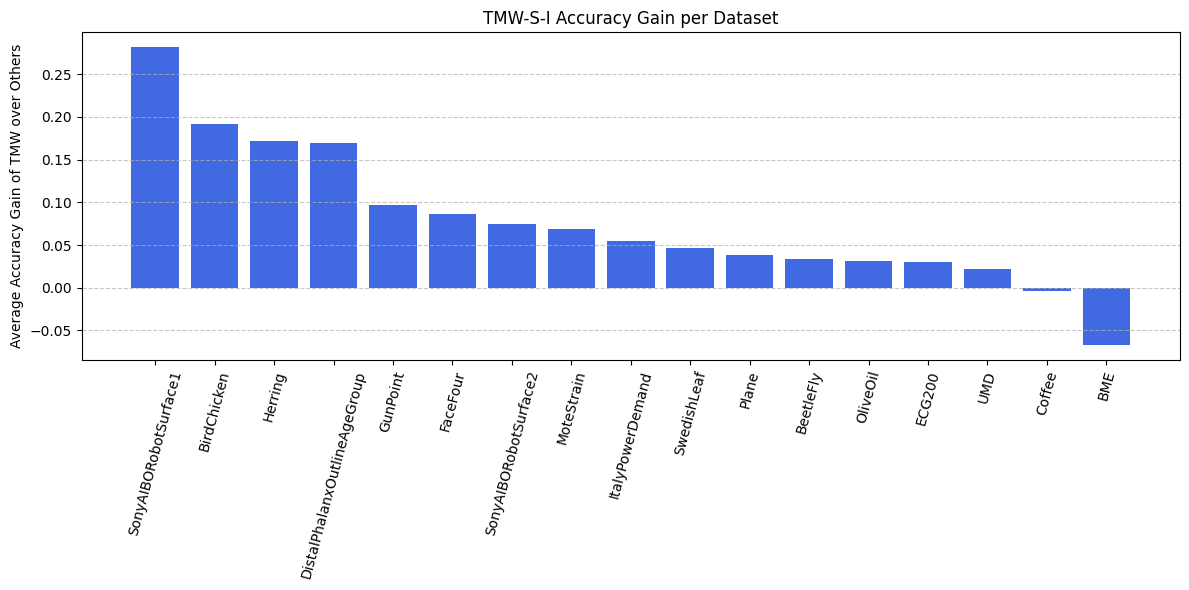

In [56]:
import matplotlib.pyplot as plt

# Calculate accuracy gain of TMW over each method per dataset
gain_df = df.copy()
methods = ["Euclidean", "dtw", "otw", "pow", "opw", "taot"]

for method in methods:
    gain_df[f"TMW_vs_{method}"] = gain_df["TMW_1"] - gain_df[method]

# Calculate average gain across all methods for visualization
gain_df["TMW_Mean_Gain"] = gain_df[[f"TMW_vs_{m}" for m in methods]].mean(axis=1)

# Sort by gain
gain_sorted = gain_df.sort_values("TMW_Mean_Gain", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(gain_sorted.index, gain_sorted["TMW_Mean_Gain"], color='royalblue')
plt.xticks(rotation=75)
plt.ylabel("Average Accuracy Gain of TMW over Others")
plt.title("TMW-S-I Accuracy Gain per Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


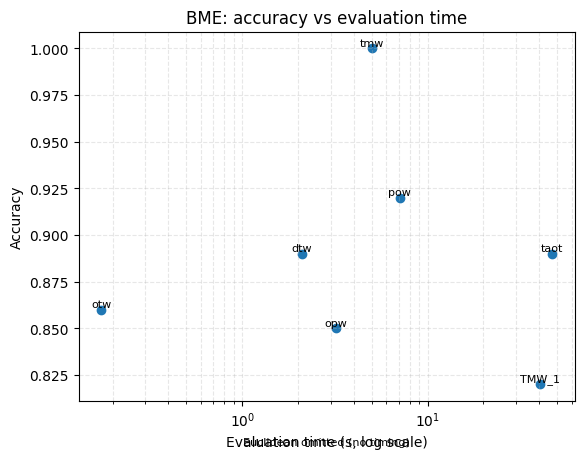

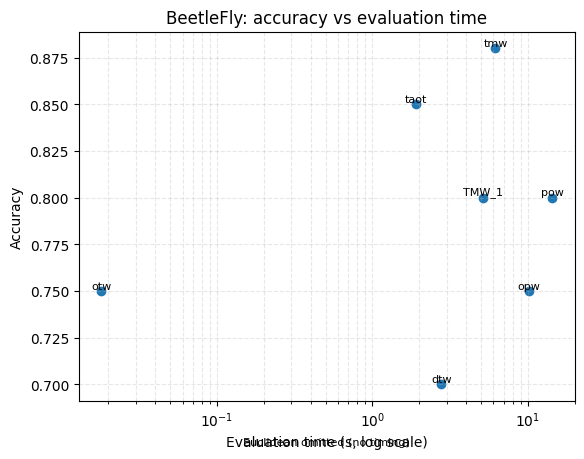

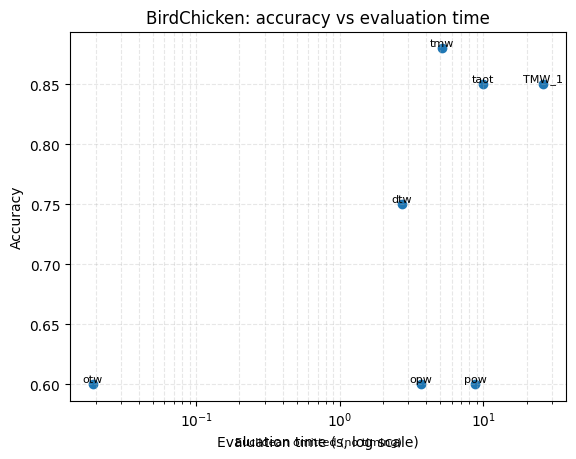

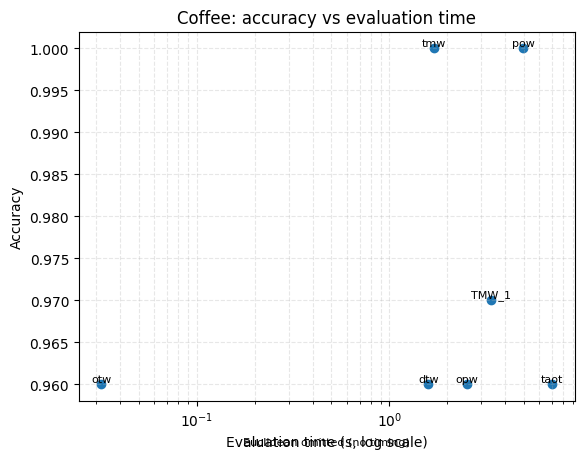

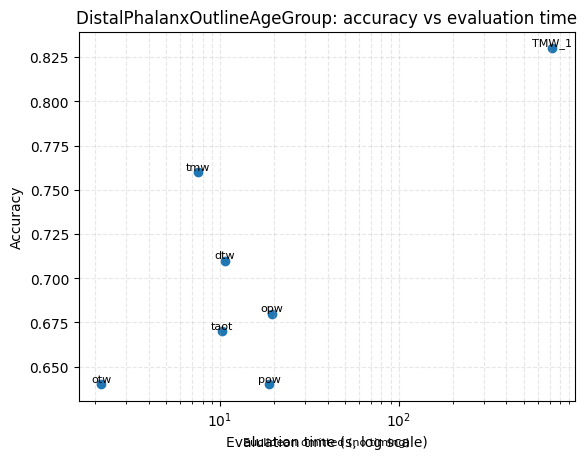

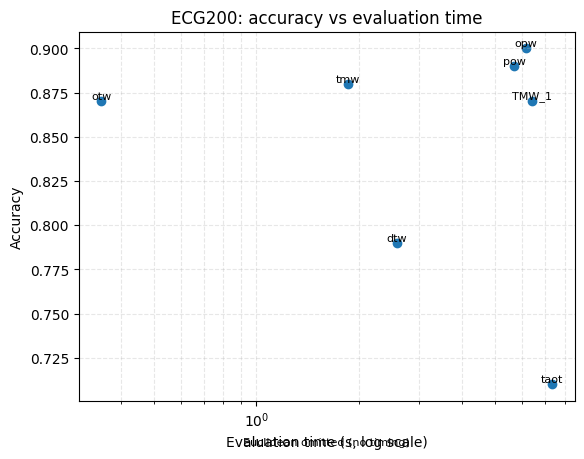

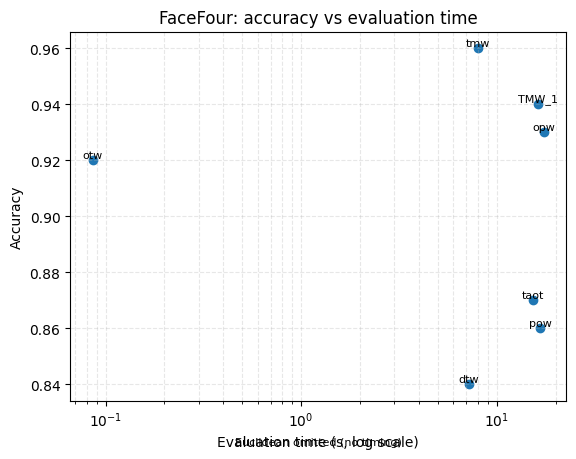

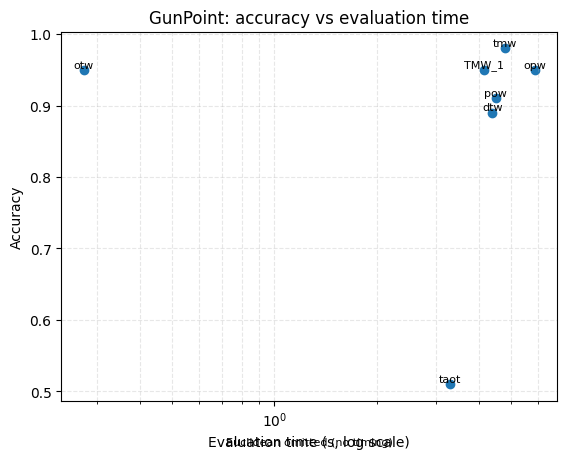

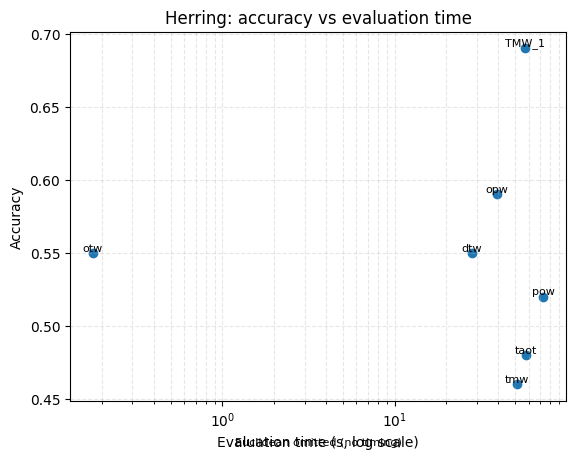

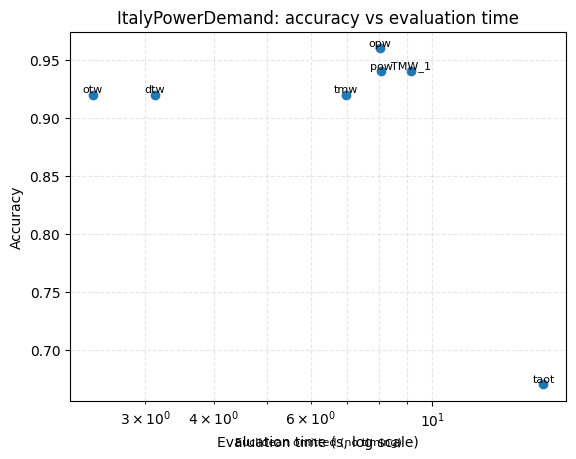

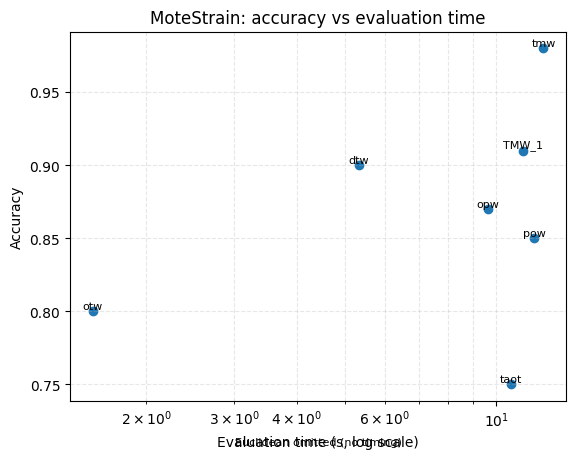

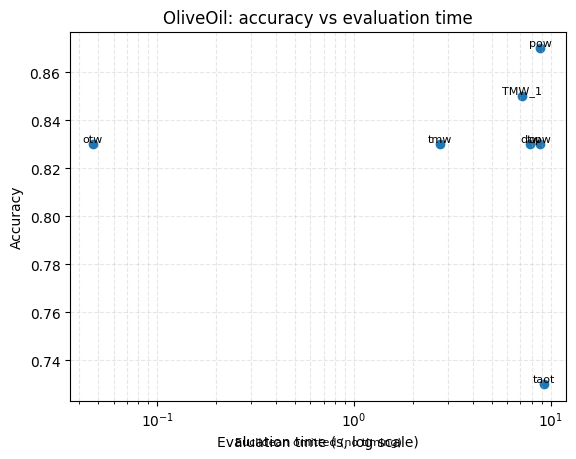

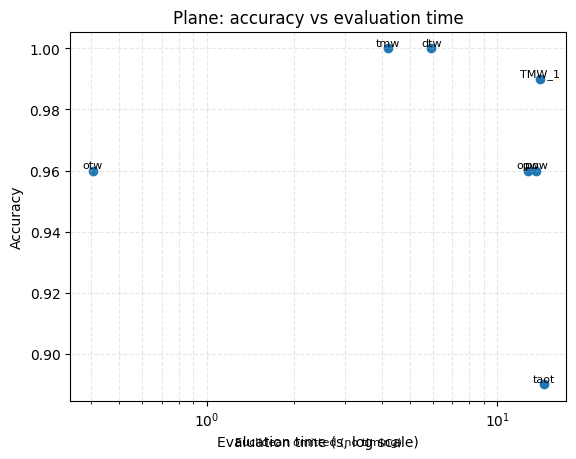

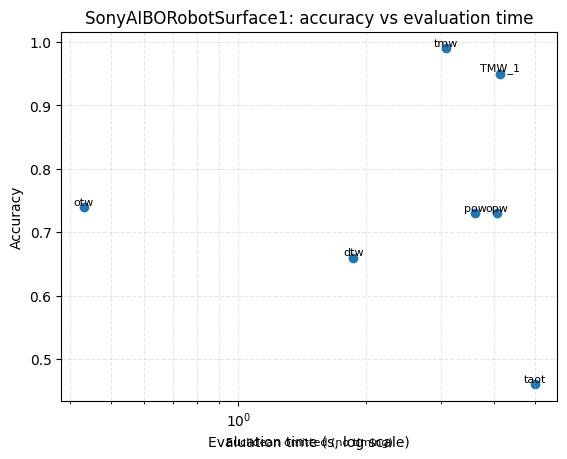

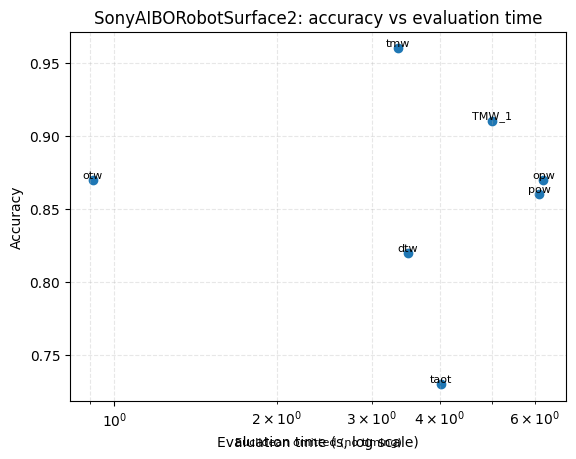

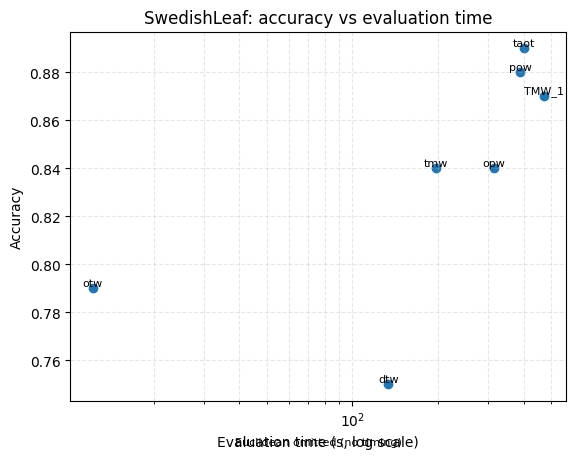

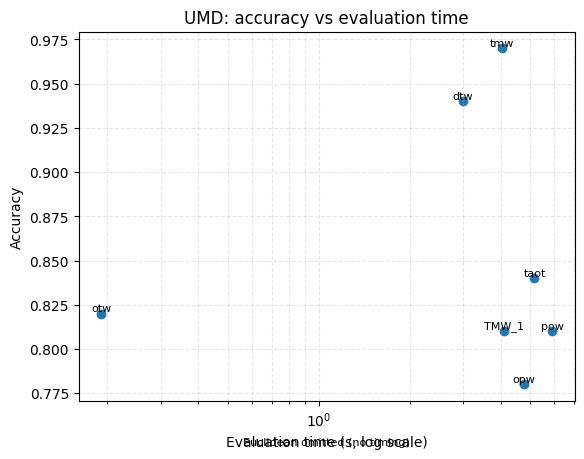

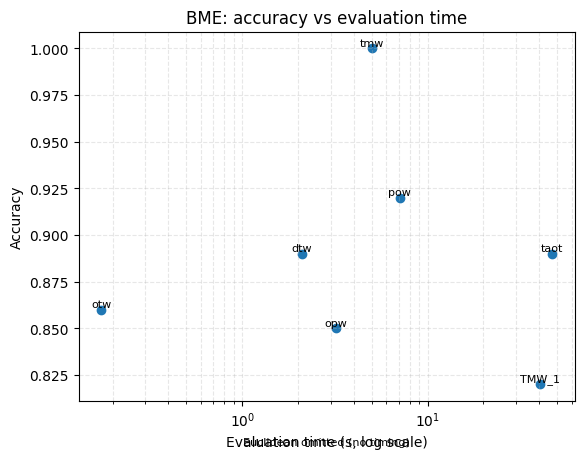

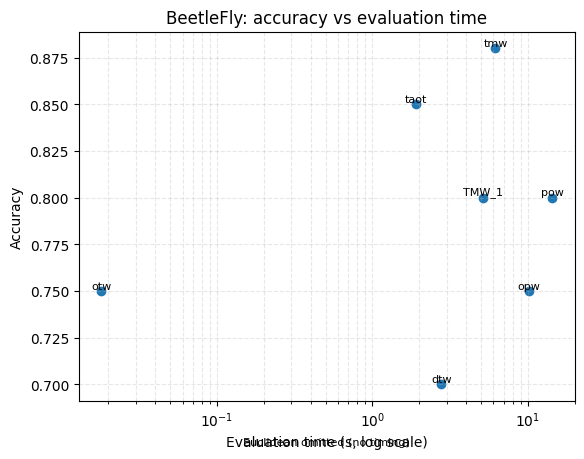

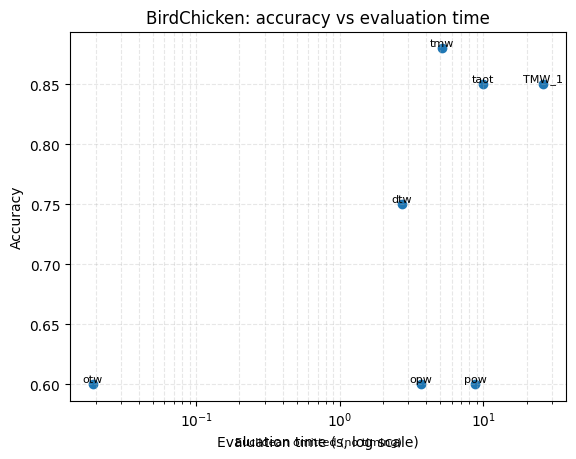

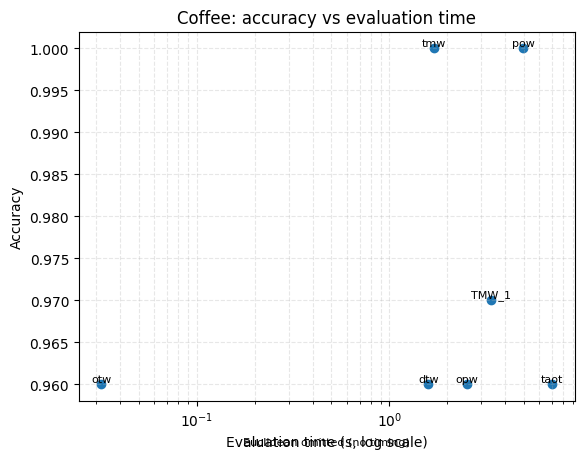

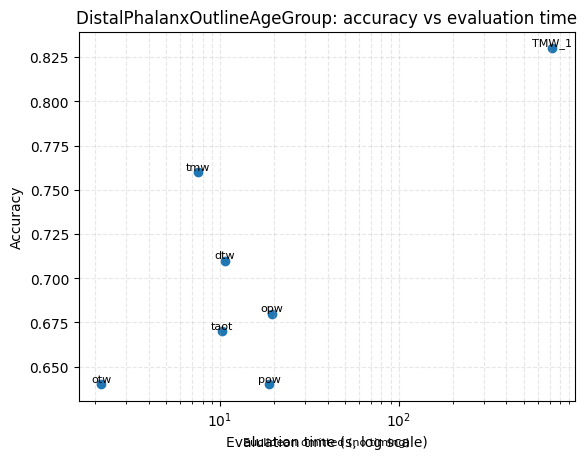

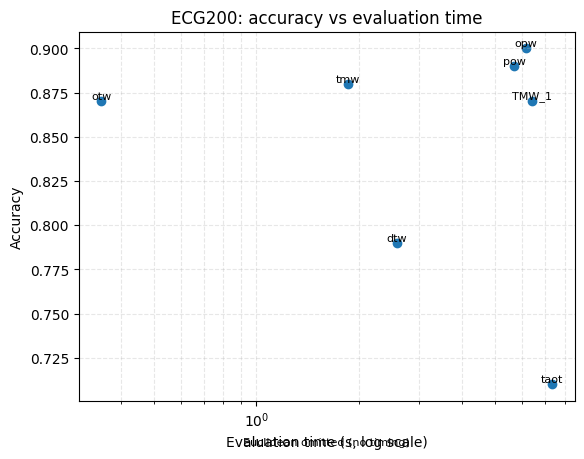

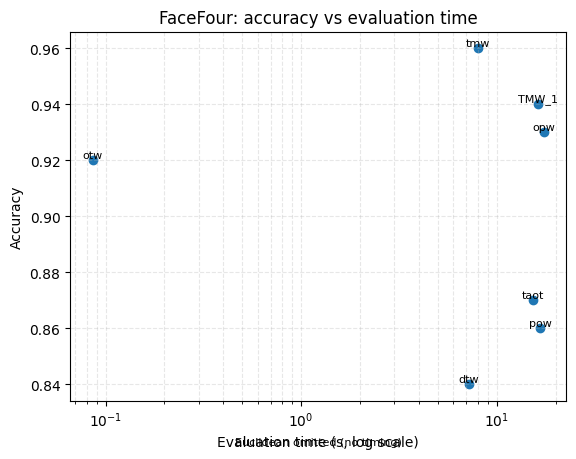

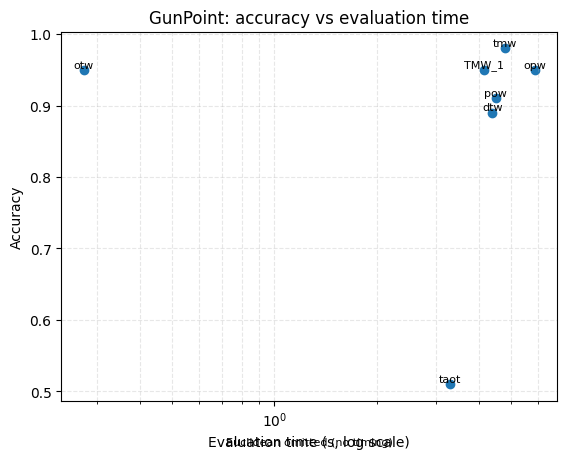

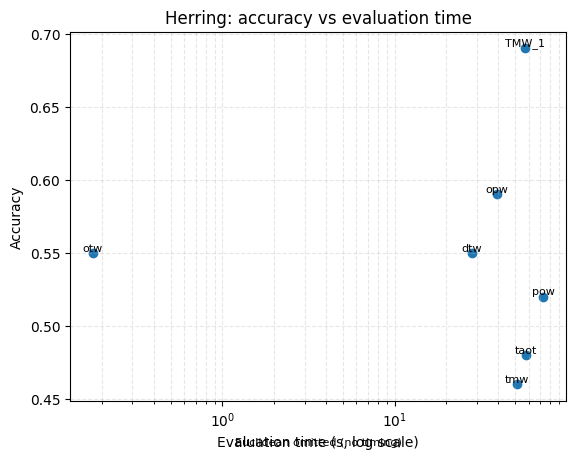

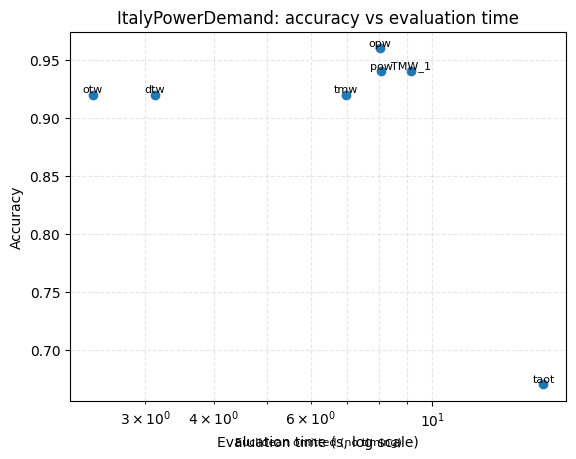

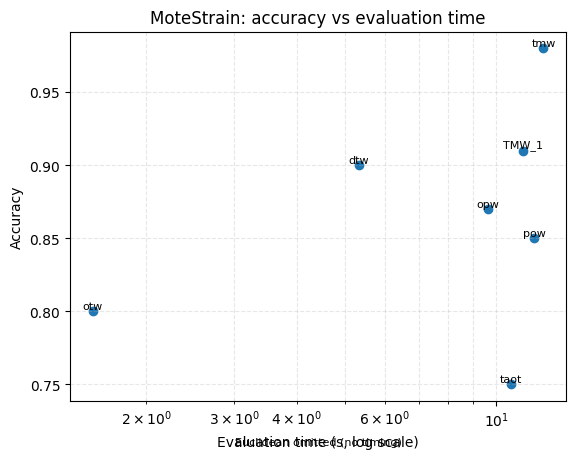

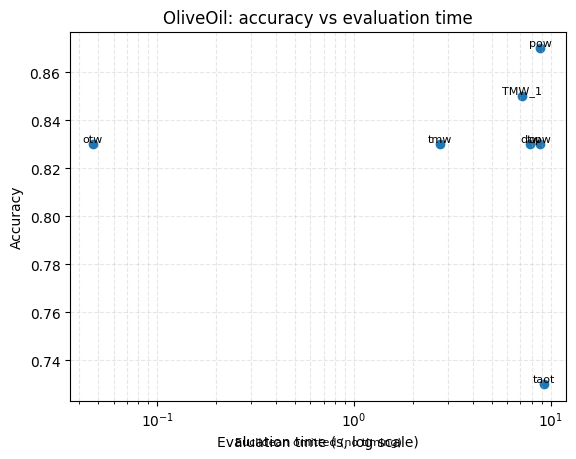

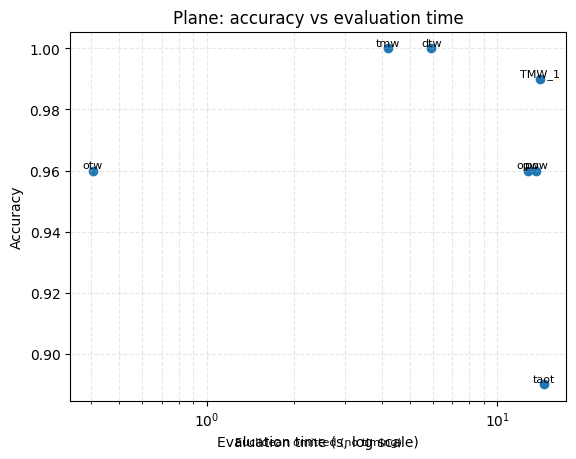

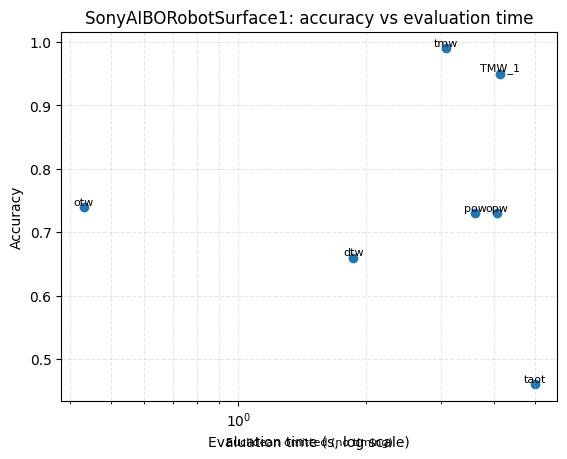

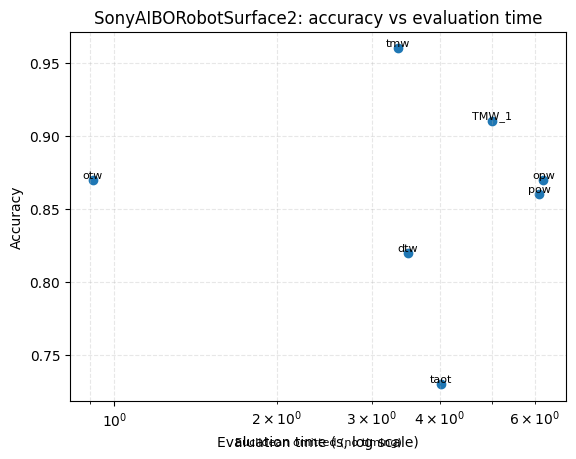

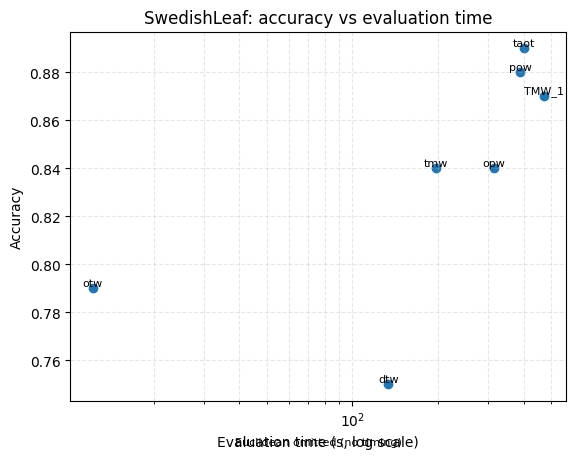

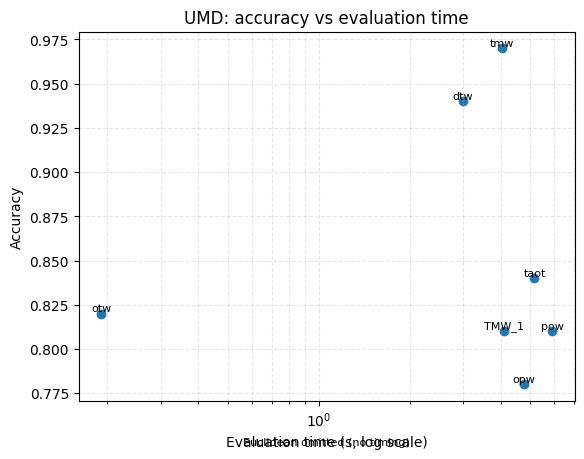

In [57]:

import pandas as pd
import matplotlib.pyplot as plt

# ── 1. Load and clean ───────────────────────────────────────────────────────────
df = pd.read_csv("logging.csv")

# Euclidean rows have no timing → drop for log-axis plotting
plot_df = df.dropna(subset=["time_eval"])

# ── 2. Loop over data-sets and draw one chart each ─────────────────────────────
for ds_name, sub in plot_df.groupby("dataset"):
    fig, ax = plt.subplots()
    # Scatter
    ax.scatter(sub["time_eval"], sub["accuracy"])
    # Annotate every point with its method
    for _, row in sub.iterrows():
        ax.text(row["time_eval"], row["accuracy"], row["method"],
                ha="center", va="bottom", fontsize=8)
    # Cosmetics
    ax.set_xscale("log")
    ax.set_xlabel("Evaluation time (s, log scale)")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{ds_name}: accuracy vs evaluation time")
    ax.grid(True, which="both", linestyle="--", alpha=0.3)

    # Footnote if Euclidean was omitted
    if df.query("dataset == @ds_name and method == 'Euclidean'").shape[0] > 0:
        ax.annotate("Euclidean omitted (no timing)",
                    xy=(0.5, -0.12), xycoords="axes fraction",
                    ha="center", fontsize=8)

    plt.show()

# Euclidean rows have no timing → drop for log-axis plotting
plot_df = df.dropna(subset=["time_eval"])

# ── 2. Loop over data-sets and draw one chart each ─────────────────────────────
for ds_name, sub in plot_df.groupby("dataset"):
    fig, ax = plt.subplots()
    # Scatter
    ax.scatter(sub["time_eval"], sub["accuracy"])
    # Annotate every point with its method
    for _, row in sub.iterrows():
        ax.text(row["time_eval"], row["accuracy"], row["method"],
                ha="center", va="bottom", fontsize=8)
    # Cosmetics
    ax.set_xscale("log")
    ax.set_xlabel("Evaluation time (s, log scale)")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{ds_name}: accuracy vs evaluation time")
    ax.grid(True, which="both", linestyle="--", alpha=0.3)

    # Footnote if Euclidean was omitted
    if df.query("dataset == @ds_name and method == 'Euclidean'").shape[0] > 0:
        ax.annotate("Euclidean omitted (no timing)",
                    xy=(0.5, -0.12), xycoords="axes fraction",
                    ha="center", fontsize=8)

    plt.show()


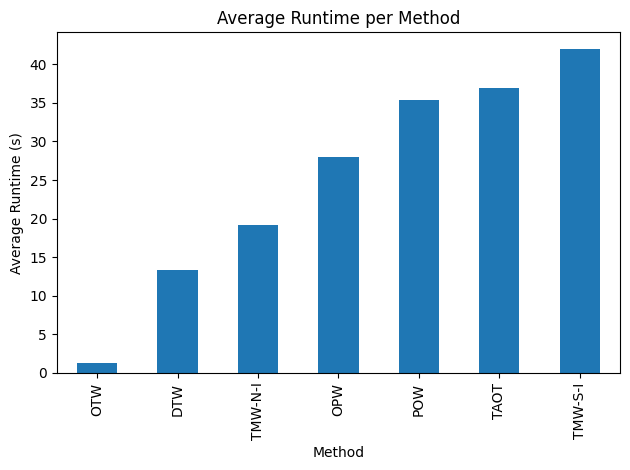

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the experimental runtime data
df = pd.read_csv('logging.csv')
df = df.loc[df.method != "Euclidean"]
# Compute average runtime per method
avg_runtime = df.groupby('method')['time_eval'].mean().sort_values()
# Bar chart of average runtime per method
plt.figure()
avg_runtime.plot(kind='bar')
#plt.yscale('log')
plt.xlabel('Method')
plt.ylabel('Average Runtime (s)')
plt.title('Average Runtime per Method')
plt.tight_layout()
plt.show()


In [98]:
log_proposed = pd.read_csv("logging.csv")

In [99]:
log_proposed

,Unnamed: 0,dataset,method,accuracy,time_eval
0,0,BeetleFly,DTW,0.70,2.780
1,1,BME,DTW,0.89,2.098
2,2,Coffee,DTW,0.96,1.592
3,3,SwedishLeaf,DTW,0.75,133.898
4,4,BirdChicken,DTW,0.75,2.701
...,...,...,...,...,...
131,12,OliveOil,Euclidean,0.82,NaN
132,13,Plane,Euclidean,0.94,NaN
133,14,SonyAIBORobotSurface1,Euclidean,0.69,NaN
134,15,SonyAIBORobotSurface2,Euclidean,0.86,NaN


In [118]:

# Select 5 representative datasets (choose any 5 that appear in both logs)
datasets = ['OliveOil', 'Coffee', 'FaceFour', 'Plane', 'ECG200']

# Prepare data for plotting
methods = ['OTW', 'DTW', 'POW', 'OPW', 'TAOT', 'TMW-S-I', 'TMW-N-I']
colors = {
    'OTW': '#2ca02c',
    'DTW': '#ff7f0e',
    'POW': '#d62728',
    'OPW': '#9467bd',
    'TAOT': '#8c564b',
    'TMW-S-I': '#24f1ec',
    'TMW-N-I': '#1f77b4',
}
df_plot = log_proposed.drop(columns="accuracy")
df_plot = df_plot[df_plot.method.values!="Euclidean"]

df_plot

,Unnamed: 0,dataset,method,time_eval
0,0,BeetleFly,DTW,2.780
1,1,BME,DTW,2.098
2,2,Coffee,DTW,1.592
3,3,SwedishLeaf,DTW,133.898
4,4,BirdChicken,DTW,2.701
...,...,...,...,...
114,115,OliveOil,TMW-S-I,7.100
115,116,Plane,TMW-S-I,14.024
116,117,SonyAIBORobotSurface1,TMW-S-I,4.139
117,118,SonyAIBORobotSurface2,TMW-S-I,5.009


In [119]:
df_plot = df_plot[df_plot.dataset.isin(datasets)]
df_plot

,Unnamed: 0,dataset,method,time_eval
2,2,Coffee,DTW,1.592
6,6,ECG200,DTW,2.582
7,7,FaceFour,DTW,7.215
12,12,OliveOil,DTW,7.867
13,13,Plane,DTW,5.932
19,19,Coffee,OTW,0.032
23,23,ECG200,OTW,0.351
24,24,FaceFour,OTW,0.086
29,29,OliveOil,OTW,0.047
30,30,Plane,OTW,0.405


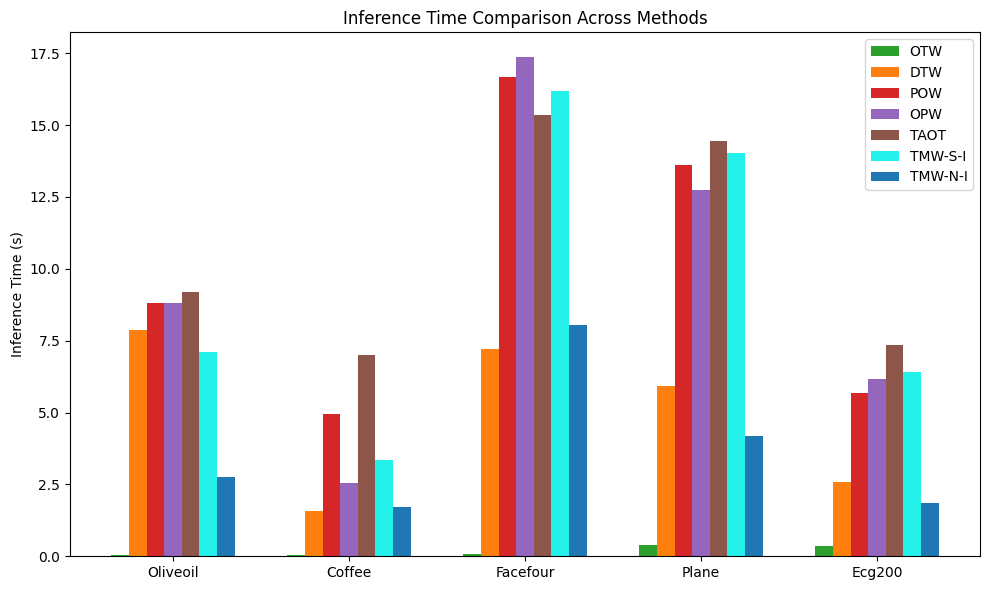

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Assume df_plot, datasets, methods, and colors are already defined as in your notebook

x = np.arange(len(datasets))  # the label locations
width = 0.1  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

for i, method in enumerate(methods):
    vals = []
    for ds in datasets:
        row = df_plot[(df_plot['dataset'] == ds) & (df_plot['method'] == method)]
        vals.append(row['time_eval'].values[0] if not row.empty else 0)
    # Shift each method's bars within the group
    ax.bar(x + (i - len(methods)/2)*width + width/2, vals, width=width, label=method, color=colors.get(method, None))

ax.set_xticks(x)
ax.set_xticklabels([ds.capitalize() for ds in datasets])
ax.set_ylabel("Inference Time (s)")
ax.set_title("Inference Time Comparison Across Methods")
ax.legend()
plt.tight_layout()
plt.show()

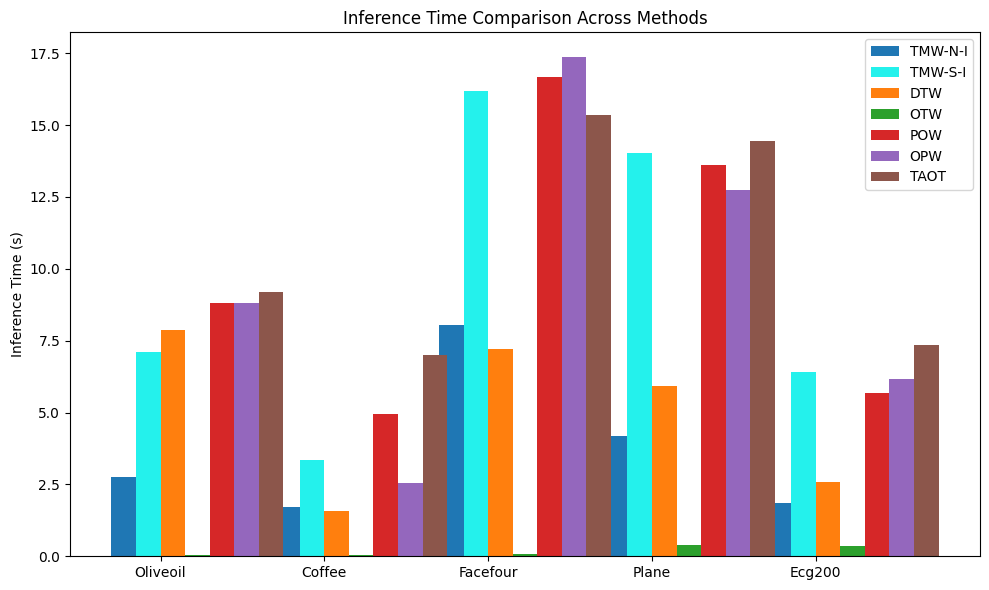

In [117]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.15
x = range(len(datasets))
for i, method in enumerate(methods):
    vals = []
    for ds in datasets:
        row = df_plot[(df_plot['dataset'] == ds) & (df_plot['method'] == method)]
        vals.append(row['time_eval'].values[0] if not row.empty else 0)
    ax.bar([xi + i*width - width*1.5 for xi in x], vals, width=width, label=method, color=colors.get(method, None))

ax.set_xticks(x)
ax.set_xticklabels([ds.capitalize() for ds in datasets])
ax.set_ylabel("Inference Time (s)")
ax.set_title("Inference Time Comparison Across Methods")
ax.legend()
plt.tight_layout()
plt.show()